## Forecasting the stock's trading time by hhm

### 1. Introduction

We can identified the state of captial market, ie,  strong bull (up fast), strong bear(down fast),  weak bull (up slow), weak bear(down slow), not too big variance . We can implement the unsupervised learning by hhm (hidden Markov chain), the sequence will be acquired. Then we can predict the next the state of captial market by RNN. We only trade in the state of capital market, up fast and upslow, other states, we cannot trade securities in capitial market.

### 2. Python Imports

This Iupter Notebook is implemented in Python and requires various packages for numerical computations and plotting.

In [1]:
% matplotlib inline
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime

C:\Users\Aizhong Lei\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 3. Load Data

In [12]:
import fix_yahoo_finance as yf
data = yf.download("BAC", start="2007-01-01", end="2018-08-12")

[*********************100%***********************]  1 of 1 downloaded


In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,53.400002,54.180000,52.990002,53.330002,43.387562,16028200
2007-01-04,53.330002,53.889999,53.049999,53.669998,43.664169,13175000
2007-01-05,53.590000,53.590000,53.029999,53.240002,43.314331,10205000
2007-01-08,53.459999,53.639999,52.799999,53.450001,43.485176,9685900
2007-01-09,53.599998,53.709999,52.970001,53.500000,43.525852,12546500


In [14]:
volume=data['Volume']
close = data['Adj Close']

logDel = np.log(np.array(data['High']))-np.log(np.array(data['Low'])) # log(high-low)
logDel=logDel[5:]

logRet_1 = np.array(np.diff(np.log(close)))
logRet_5 = np.log(np.array(close[5:]))-np.log(np.array(close[:-5]))

logVol_5 = np.log(np.array(volume[5:]))-np.log(np.array(volume[:-5]))

logret_1 = logRet_1[4:]
close = close[5:]
date = pd.to_datetime(data.index[5:])

A = np.column_stack([logDel,logRet_5,logVol_5])

In [15]:
A.shape

(2918, 3)

In [16]:
volume=data['Volume']
close = data['Adj Close']

data['logHL'] = np.log(data['High']-data['Low']) # log(high-low)

data['logRet_1'] = data['Adj Close'].pct_change()
data['logRet_5'] = data['Adj Close'].pct_change(5)
data['logVol_5'] = np.log(np.array(volume[5:]))-np.log(np.array(volume[:-5]))

logret_1 = logRet_1[4:]
close = close[5:]
date = pd.to_datetime(data.index[5:])

A = np.column_stack([logDel,logRet_5,logVol_5])

### 4. Indentified the states of captial market

In [17]:
# predict by unsepervised learning by Hidden Markov chain

from hmmlearn.hmm import GaussianHMM

class HMMStock():
    
    def __init__(self,data,n_components,ret):
        self.data=data
        self.ret = ret
        self.n_components=n_components ## the number of the hidden states
        self.hidden_states = hidden_states
        self.hStates = hStates # Solidated the order, 0, 1, 2, 3 ...According to the profit in the states from high to low
        
    def hStates_Comp(data):
        hmm_model = GaussianHMM(n_components = n, covariance_type="full",n_iter=5000)
        hmm_model.fit(self.data)
        hidden_states = model.predict(self.data)
        self.hidden_states=hidden_states
        return self.hidden_states
    
    def get_hStates(hidden_states,n_components,ret):
        hStates=np.zeros(len(hidden_states))
        ret_n = np.zeros(n_components)

        for i in range(n_components):
            pos = (hidden_states==i)
            ret_n[i]=ret[pos].sum()

        xx=np.sort(ret_n)[::-1]

        hStates=np.zeros(len(hidden_states))
        for i in range(n_components):        
            for j in range(n_components):
                if xx[j]==ret_n[i]:
                    for k in range(len(hidden_states)):
                        if hidden_states[k]==i:
                            hStates[k]= j    
        return hStates
    
    def plot_Hidden_States():
        plt.figure(figsize=(25,18))
        for i in range(hmm_model.n_components):
            pos = (hidden_states==i)
            plt.plot_date(date[pos],close[pos],'o',label='hidden state %d' %i, lw=2)
            plt.legend(loc="left")
        return plt.show()    
    
    def plot_Ret_States():           
        res=[]
        res = pd.DataFrame({'Date':date[idx:n],'state_ret':logret_1[idx:n],'hidden state':hidden_states}).set_index('Date')

        plt.figure(figsize=(25,18))
        for i in range(model.n_components):
            pos = (hidden_states==i)
            pos = np.append(0,pos[:-1])
            df = res.state_ret
            res['state_ret%s'%i]=df.multiply(pos)
            plt.plot_date(res.index,np.exp(res['state_ret%s'%i].cumsum()),'-',label='hidden state %d' %i)
            plt.legend(loc="upper left")
            
        return plt.show()


In [18]:
# predict by unsepervised learning by Hidden Markov chain
idx=0
n=len(A)
n_components = 3 # three hidden states
model = GaussianHMM(n_components = n_components, covariance_type="full",n_iter=5000).fit(A[idx:n])
hidden_states = model.predict(A[idx:n])
hidden_states

C:\Users\Aizhong Lei\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Aizhong Lei\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Aizhong Lei\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Aizhong Lei\Anaconda3\lib\site-packages\sklear

array([2, 2, 2, ..., 2, 2, 2])

In [19]:
hidden_states

array([2, 2, 2, ..., 2, 2, 2])

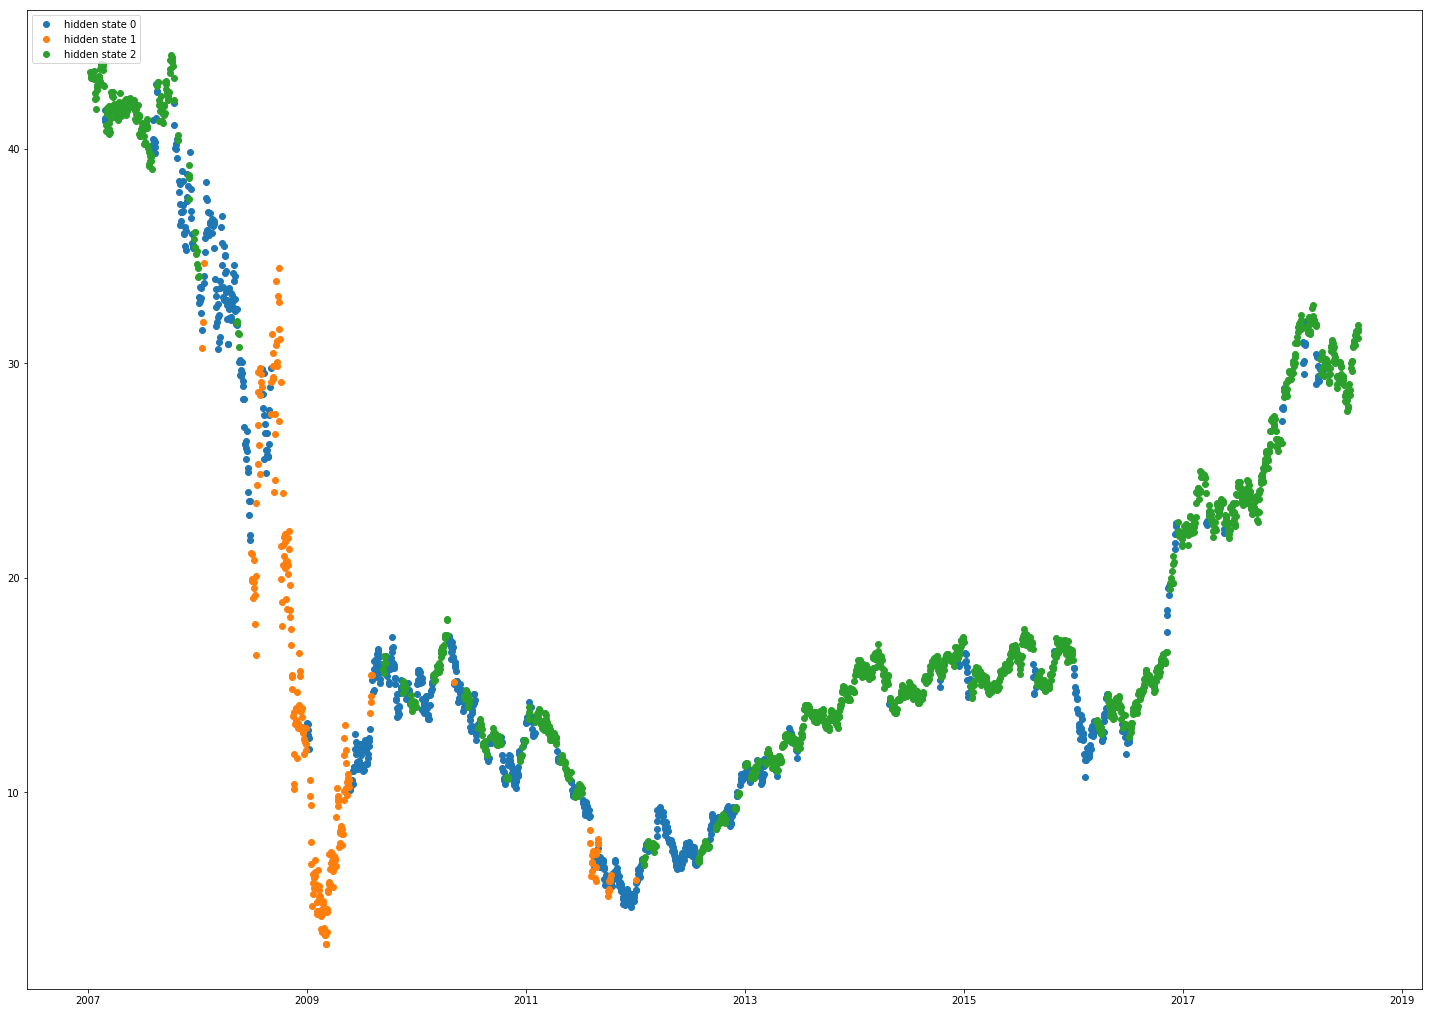

In [24]:
plt.figure(figsize=(25,18))
for i in range(model.n_components):
    pos = (hidden_states==i)
    plt.plot_date(date[idx:n][pos],close[idx:n][pos],'o',label='hidden state %d' %i, lw=2)
    plt.legend(loc="upper left")

In [21]:
res = pd.DataFrame({'Date':date[idx:n],'state_ret':logret_1[idx:n],'hidden state':hidden_states}).set_index('Date')
res.head()

,hidden state,state_ret
Date,,
2007-01-10,2,0.001494
2007-01-11,2,-0.005990
2007-01-12,2,0.002251
2007-01-16,2,0.001123
2007-01-17,2,-0.002248


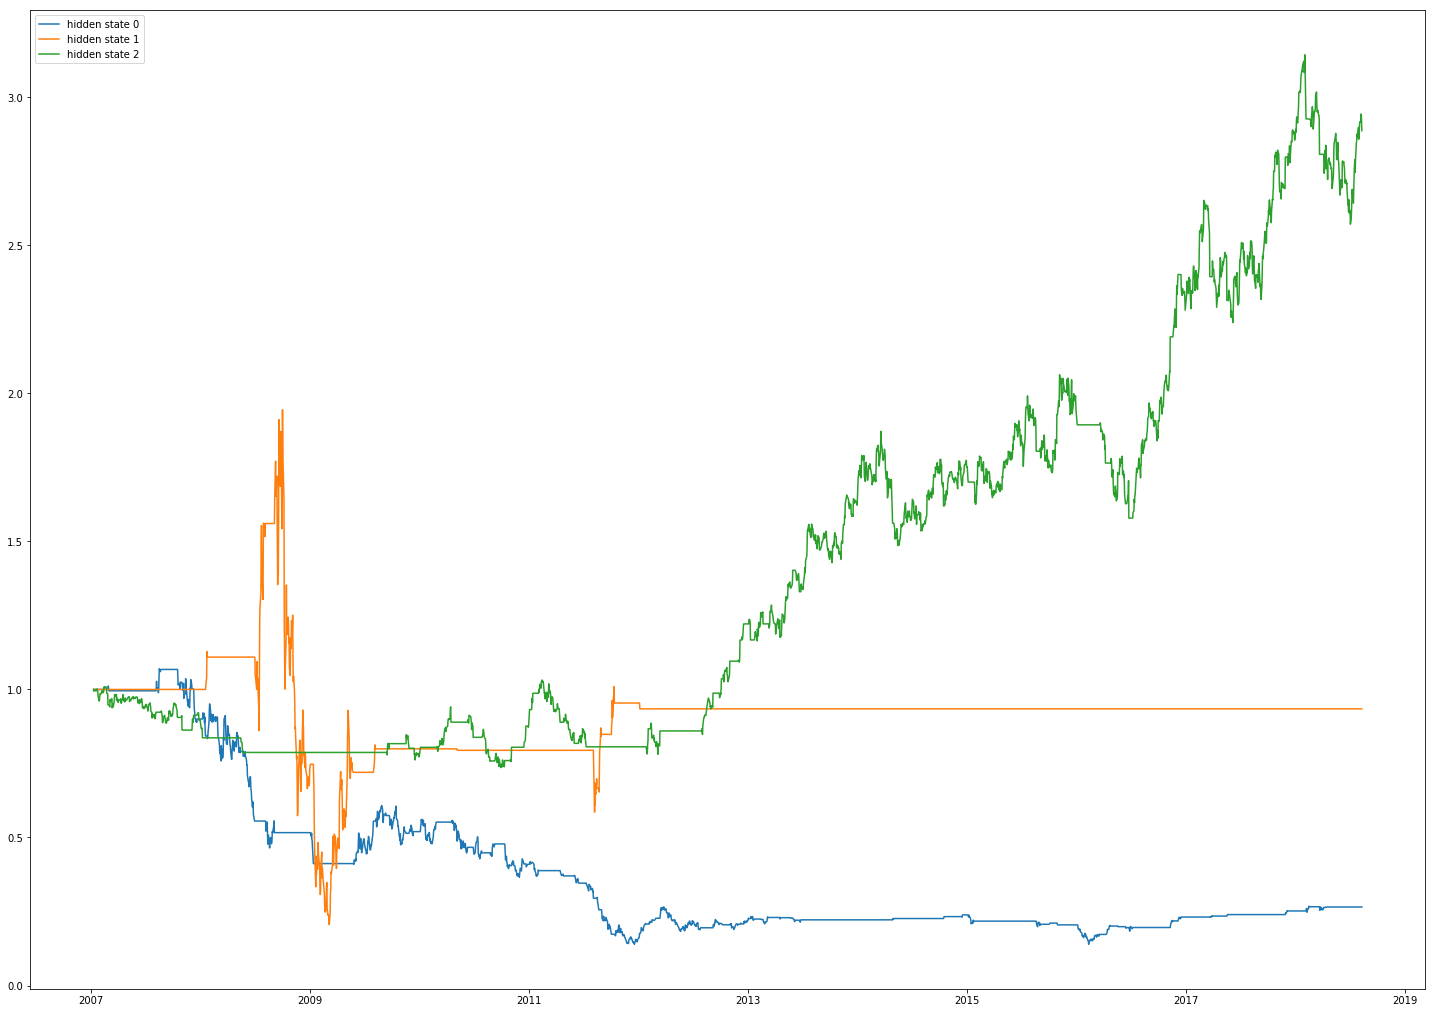

In [22]:
res=[]
res = pd.DataFrame({'Date':date[idx:n],'state_ret':logret_1[idx:n],'hidden state':hidden_states}).set_index('Date')

plt.figure(figsize=(25,18))
for i in range(model.n_components):
    pos = (hidden_states==i)
    pos = np.append(0,pos[:-1])
    df = res.state_ret
    res['state_ret%s'%i]=df.multiply(pos)
    plt.plot_date(res.index,np.exp(res['state_ret%s'%i].cumsum()),'-',label='hidden state %d' %i)
    plt.legend(loc="upper left")